In [1]:
-- Requirements
require 'nn'
require 'image'
require 'csvigo'
require 'loadcaffe'
require 'optim'
Plot = require 'itorch.Plot'

In [2]:
-- loading data
file = csvigo.load({path = "/home/lerrel/Dhiraj_stuff/Kaggle/Right_Whale/data/train.csv",mode = "large"})

-- reading images from folder
folder_path = "/home/lerrel/Dhiraj_stuff/Kaggle/Right_Whale/data/imgs"
data = image.loadJPG(folder_path.."/"..file[2][1],3,'byte')

-- num of train data
num_train_data = #file - 1
--num_train_data = 50


--in the file .. whale id are given.. we have to define the class depending on that
y_train = torch.Tensor(num_train_data ):zero()
-- it contains id corresponding to the class
whale_id = {}

-- insert the first data
table.insert(whale_id, file[2][2])
y_train[1] = 1

for i = 2, num_train_data do
    
    -- for y label
    j = 1
    while j <= #whale_id do
        
        if whale_id[j] == file[ i + 1 ][2] then
            break
        end
        
        j = j + 1 
    end
    
    if j == #whale_id + 1 then
        table.insert(whale_id, file[ i + 1 ][2])
    end
    
    y_train[i] = j 
    
end

<csv>	parsing file: /home/lerrel/Dhiraj_stuff/Kaggle/Right_Whale/data/train.csv	
<csv>	parsing done	


In [3]:
#file

4545	


In [4]:
#y_train

 4544
[torch.LongStorage of size 1]



In [5]:
#whale_id

447	


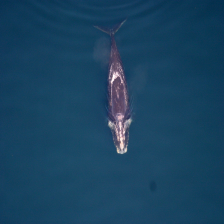

In [6]:
itorch.image(image.scale(image.loadJPG(folder_path.."/"..file[2][1],3,'byte'), 224,224))

In [7]:
-- loading the model 
-- i'm going to use pretrained model.. with little change in the architecture
model_VGG = loadcaffe.load(' VGG_ILSVRC_19_layers_deploy.prototxt','VGG_ILSVRC_19_layers.caffemodel','nn')

Successfully loaded VGG_ILSVRC_19_layers.caffemodel


conv1_1: 64 3 3 3
conv1_2: 64 64 3 3
conv2_1: 128 64 3 3
conv2_2: 128 128 3 3


conv3_1: 256 128 3 3
conv3_2: 256 256 3 3


conv3_3: 256 256 3 3


conv3_4: 256 256 3 3


conv4_1: 512 256 3 3


conv4_2: 512 512 3 3


conv4_3: 512 512 3 3


conv4_4: 512 512 3 3


conv5_1: 512 512 3 3


conv5_2: 512 512 3 3


conv5_3: 512 512 3 3


conv5_4: 512 512 3 3


fc6: 1 1 25088 4096


fc7: 1 1 4096 4096


fc8: 1 1 4096 1000


In [8]:
print(tostring(model_VGG))

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> (32) -> (33) -> (34) -> (35) -> (36) -> (37) -> (38) -> (39) -> (40) -> (41) -> (42) -> (43) -> (44) -> (45) -> (46) -> output]
  (1): nn.SpatialConvolution(3 -> 64, 3x3, 1,1, 1,1)
  (2): nn.ReLU
  (3): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
  (4): nn.ReLU
  (5): nn.SpatialMaxPooling(2,2,2,2)
  (6): nn.SpatialConvolution(64 -> 128, 3x3, 1,1, 1,1)
  (7): nn.ReLU
  (8): nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1)
  (9): nn.ReLU
  (10): nn.SpatialMaxPooling(2,2,2,2)
  (11): nn.SpatialConvolution(128 -> 256, 3x3, 1,1, 1,1)
  (12): nn.ReLU
  (13): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (14): nn.ReLU
  (15): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (16): nn.ReLU
  (17): nn.SpatialConvolution(256

In [9]:
-- we will try to fine tune the FC layers... so i will delete layers from 39 - 46 from model_VGG
model_VGG:remove(46)
model_VGG:remove(45)
model_VGG:remove(44)
model_VGG:remove(43)
model_VGG:remove(42)
model_VGG:remove(41)
model_VGG:remove(40)
model_VGG:remove(39)
print(tostring(model_VGG))

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> (15) -> (16) -> (17) -> (18) -> (19) -> (20) -> (21) -> (22) -> (23) -> (24) -> (25) -> (26) -> (27) -> (28) -> (29) -> (30) -> (31) -> (32) -> (33) -> (34) -> (35) -> (36) -> (37) -> (38) -> output]
  (1): nn.SpatialConvolution(3 -> 64, 3x3, 1,1, 1,1)
  (2): nn.ReLU
  (3): nn.SpatialConvolution(64 -> 64, 3x3, 1,1, 1,1)
  (4): nn.ReLU
  (5): nn.SpatialMaxPooling(2,2,2,2)
  (6): nn.SpatialConvolution(64 -> 128, 3x3, 1,1, 1,1)
  (7): nn.ReLU
  (8): nn.SpatialConvolution(128 -> 128, 3x3, 1,1, 1,1)
  (9): nn.ReLU
  (10): nn.SpatialMaxPooling(2,2,2,2)
  (11): nn.SpatialConvolution(128 -> 256, 3x3, 1,1, 1,1)
  (12): nn.ReLU
  (13): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (14): nn.ReLU
  (15): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (16): nn.ReLU
  (17): nn.SpatialConvolution(256 -> 256, 3x3, 1,1, 1,1)
  (18): nn.ReLU
  (19): nn.SpatialMaxPoo

In [10]:
-- for our case the number of labels to predict are 448.. so for this Im going to change final FC layer of orginal VGG_Net
model = nn.Sequential()

-- also reduced 4096 to 1024
model:add(nn.Linear(25088,1024))
model:add(nn.ReLU())
model:add(nn.Dropout(0.5))

-- removing this part.. my cpu is unable to handle it
--model:add(nn.Linear(4096,4096))
--model:add(nn.ReLU())
--model:add(nn.Dropout(0.5))

model:add(nn.Linear(1024,447))
model:add(nn.LogSoftMax())

print(tostring(model))

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> output]
  (1): nn.Linear(25088 -> 1024)
  (2): nn.ReLU
  (3): nn.Dropout(0.500000)
  (4): nn.Linear(1024 -> 447)
  (5): nn.LogSoftMax
}	


In [11]:
-- assign variables to w and to its gradient
w, dw = model:getParameters()

In [12]:
y_train:max()

447	


In [13]:
-- chose the cost function
criterion = nn.ClassNLLCriterion()

In [14]:
find_accuracy = function(pred,expected)
    acc = pred:double():eq(expected:double()):sum() / (#pred)[1] 
    return acc 
end

In [15]:
#data

    3
 2048
 3072
[torch.LongStorage of size 3]



In [16]:
-- f_eval function
-- NOTE - Add Desciption
-- also get to learn how to define function in torch
-- dynamic loading of the data has been added
-- shuffle of data on epoch is turned off

feval = function(w_new)
    
    if w ~= w_new then
        w:copy(w_new)
    end
    
    -- batch data implementation
    batch_size = 1
    
    start_idx = (start_idx or 0) + 1 
    if start_idx > num_train_data then 
        start_idx = 1
        epoch = (epoch or 0) + 1
    end
    
    stop_idx  = start_idx + batch_size - 1
    if stop_idx > num_train_data then 
        stop_idx = num_train_data
        epoch = (epoch or 0) + 1
    end
    
    -- copy the inputs in local variable
    local input = torch.Tensor(stop_idx - start_idx + 1, 3,224,224)
    local y = torch.Tensor(stop_idx - start_idx + 1)
    
    -- here load the data dynamically
    for i = 1, stop_idx - start_idx + 1 do
        input[i] = image.scale( image.loadJPG(folder_path.."/"..file[start_idx + i][1],3,'byte'), 224, 224)
        end
    
    y[{{1, stop_idx - start_idx + 1}}] = y_train[{{start_idx, stop_idx}}]
    
    -- make the gradient zero.. to  avoid the accumulation
    dw:zero()
    
    -- calculating input for new model
    local model_input = model_VGG:forward(input)
    
    -- calculate the loss
    local batch_pred = model:forward(model_input)
    local batch_loss = criterion:forward(batch_pred,y)
    local grad_criterion = criterion:backward(batch_pred, y)
    model:backward(model_input, grad_criterion)
    
    -- finding the accuracy
    -- NOTE the batch pred dimension... max in row or column will be decided based on that
    local _,pred_indx = torch.max(batch_pred,2) 
    pred_indx:double()
    local accuracy = find_accuracy(pred_indx,y)
    
    if verbose == true then
        print(string.format("Epoch = %d  Loss = %04f  Accuracy = %02f",epoch,batch_loss,accuracy))
    end
    
    -- assign value to start index
    start_idx = stop_idx 
    
    
    -- always return loss,gradient
    return batch_loss, dw
end


In [17]:
-- define optimization params
sgd_params = { learningRate = 1e-4,
   learningRateDecay = 0,
   weightDecay = 1,
   momentum = 0
}

In [23]:
-- the main loop
-- describe the stopping criterion
-- here i chose no of iteration
loss_h = {}
epoch = 0
num_epoch = 5
verbose = false
while epoch < num_epoch do 
    _,loss = optim.sgd(feval,w,sgd_params)
    table.insert(loss_h,loss[1])
    collectgarbage()
end

In [24]:
-- plot the loss 
plot = Plot():circle( torch.linspace(1,#loss_h,#loss_h), torch.Tensor(loss_h)):draw()

In [22]:
num_epoch

1	
